In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
mobileData = pd.read_csv('mobile_data_final.csv')
mobileData.head()

,disp_size,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,resolution_width,...,os_Android Nougat 7.1.1,os_Android Nougat 7.1.2,os_Android Oreo 8,os_Android Oreo 8.1,os_Android Pie 9,num_cores_Quad Core,network_top_4G,network_top_4G VOLTE,network_top_5G,mobile_price
0,16.56,2.0,32,3,5000,75.0,164.4,8.95,195.0,1600,...,0,0,0,0,0,0,0,1,0,160
1,16.56,2.0,32,3,5000,75.0,164.4,8.95,195.0,1600,...,0,0,0,0,0,0,0,1,0,160
2,16.56,2.0,64,4,5000,75.0,164.4,8.95,195.0,1600,...,0,0,0,0,0,0,0,1,0,178
3,16.56,2.0,64,4,5000,75.0,164.4,8.95,195.0,1600,...,0,0,0,0,0,0,0,1,0,178
4,16.51,2.0,128,4,5000,75.4,164.4,9.00,199.0,1600,...,0,0,0,0,0,0,0,1,0,214


# Before Feature Selection

We naively fit all the data into the model first.

## Linear Regression

In [4]:
# Extract Response and Predictors
y = pd.DataFrame(mobileData['mobile_price'])
X = pd.DataFrame(mobileData.drop('mobile_price', axis = 1))

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (333, 1) (333, 57)
Test Set  : (111, 1) (111, 57)


In [5]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()         
linreg.fit(X_train, y_train)

LinearRegression()

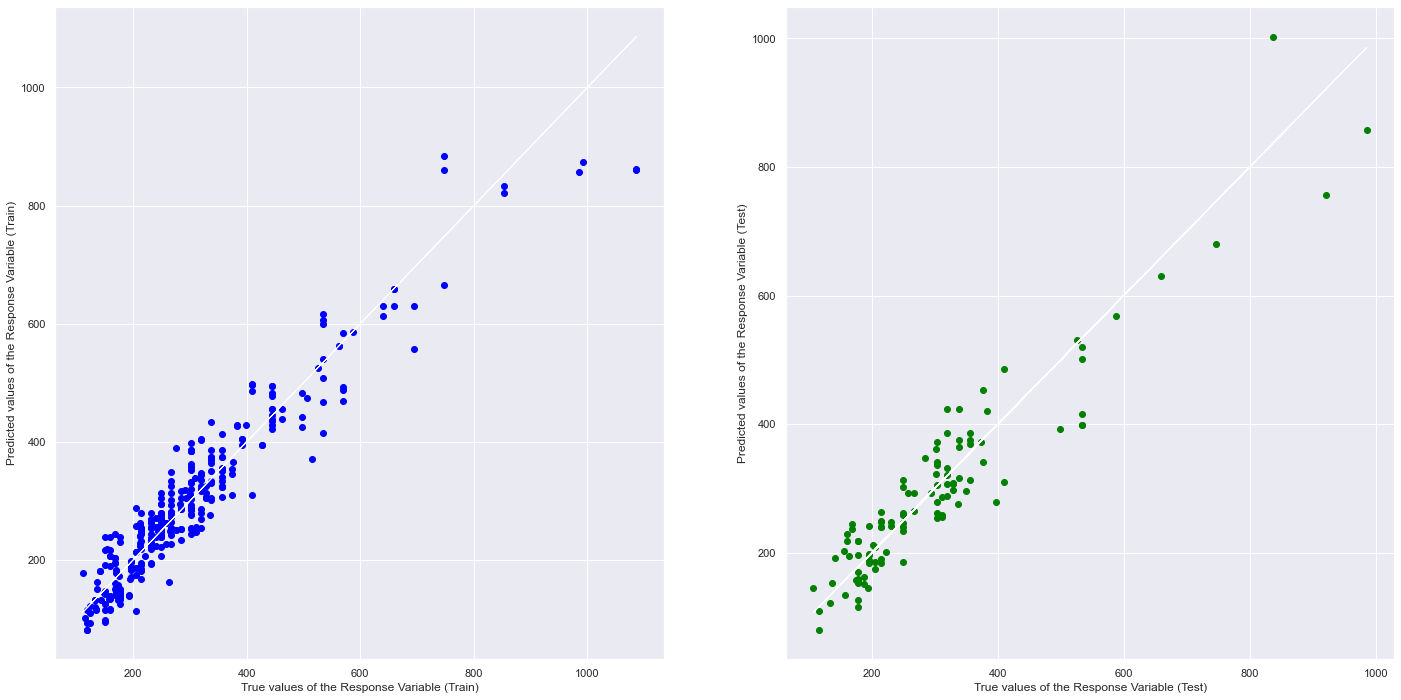

In [6]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9121313139417233
Mean Squared Error (MSE) 	: 2128.2987742227683

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8839971380092337
Mean Squared Error (MSE) 	: 2831.909337613347



## Random Forest Regressor

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(n_estimators = 1500,  # CHANGE AND EXPERIMENT
                                 max_depth = 5)       # CHANGE AND EXPERIMENT

rforest.fit(X_train, y_train.mobile_price.ravel())

RandomForestRegressor(max_depth=5, n_estimators=1500)

<BarContainer object of 37 artists>

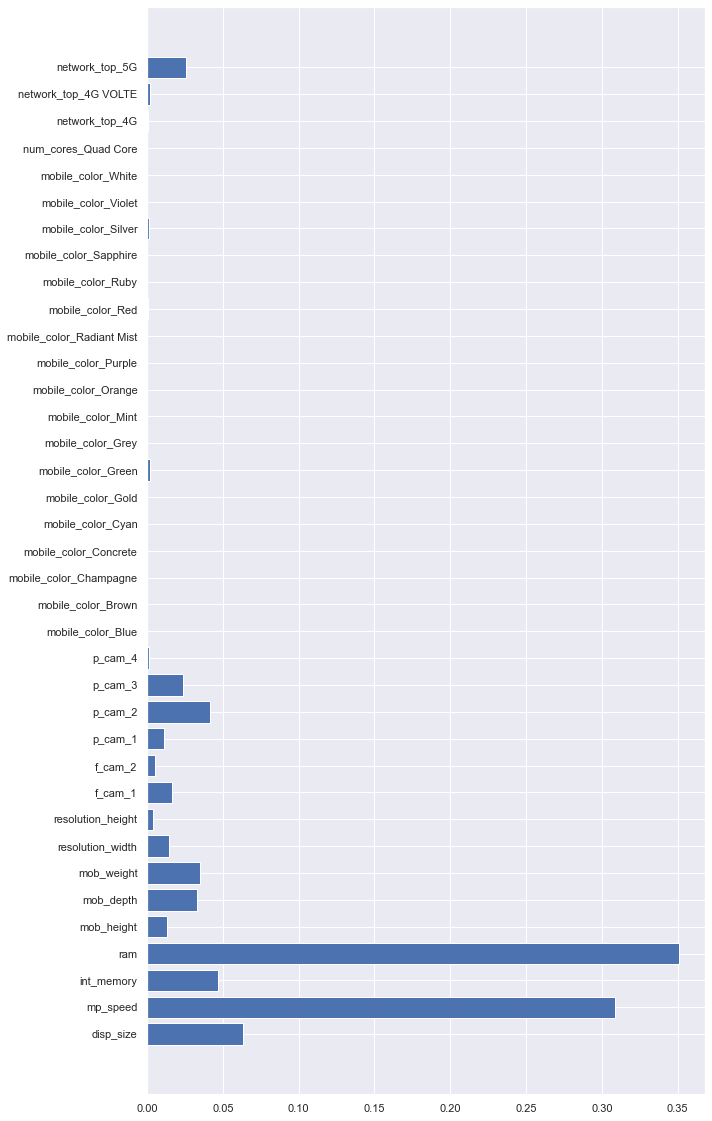

In [29]:
plt.figure(figsize=(10,20))
plt.barh(list(X.columns), rforest.feature_importances_)

Similar with our previous EDA, the most important variables in Random Forest Regressor are ***network_top***, ***ram***, ***int_memory***, ***mp_speed*** and ***disp_size***. Surprisingly, ***mobile_color*** shows a very weak relationship with the ***mobile_price***. Perhaps it is due to the fact that there exist too many **unique_values** for ***mobile_color*** column.

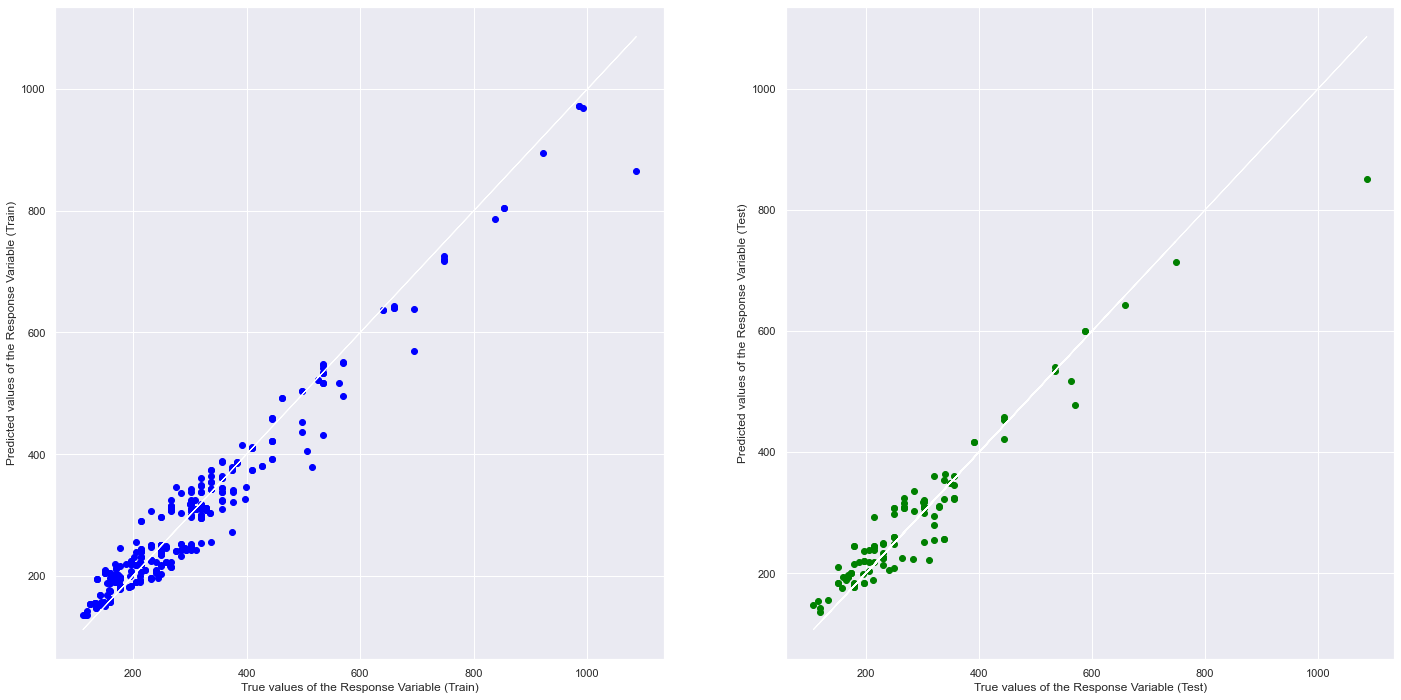

In [30]:
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [31]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9511987043521181
Mean Squared Error (MSE) 	: 1256.887857229438

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9155817038794838
Mean Squared Error (MSE) 	: 1644.1514133064552



## GridSearch

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(800,1801,100),   
              'max_depth': np.arange(7, 13)}             


hpGrid = GridSearchCV(RandomForestRegressor(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'r2')       


hpGrid.fit(X_train, y_train.mobile_price.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 7,  8,  9, 10, 11, 12]),
                         'n_estimators': array([ 800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800])},
             scoring='r2')

In [14]:
print("Best Estimator:", hpGrid.best_estimator_)

print("Best Score:", np.abs(hpGrid.best_score_))

Best Estimator: RandomForestRegressor(max_depth=9, n_estimators=1100)
Best Score: 0.9074780722696787


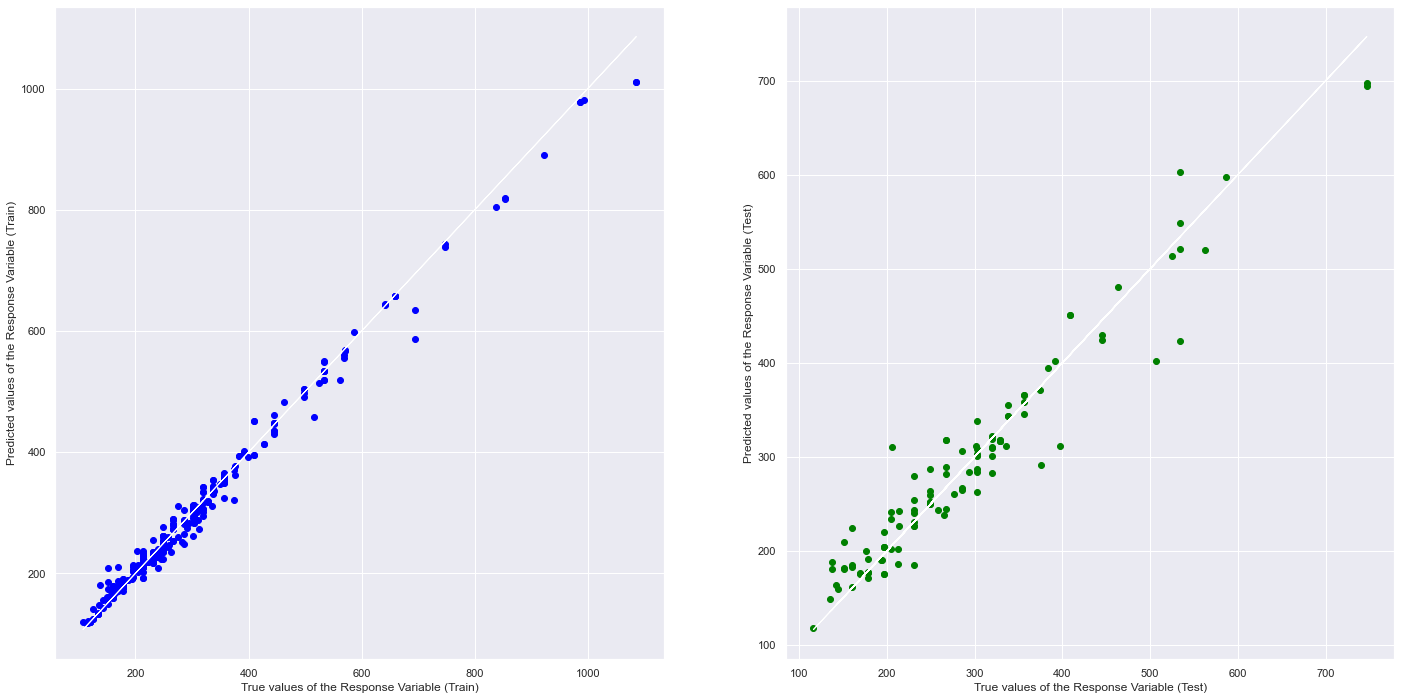

In [15]:
y_train_pred = hpGrid.predict(X_train)
y_test_pred = hpGrid.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [16]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", hpGrid.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", hpGrid.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9899709739582819
Mean Squared Error (MSE) 	: 274.5718587862885

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9320136252037212
Mean Squared Error (MSE) 	: 1007.1283052423654



---
# Feature Selection

Now, we remove those less important variables based on what we observed in the EDA part, in order to reduce the noise of our model.

Variables to be removed: ***os***, ***mob_width***, ***mob_brand***, ***battery_power***

In [17]:
mobileData_new = pd.DataFrame(mobileData.drop(['mob_width', 'os_Android Lollipop 5.1', 'os_Android Lollipop 5.4.1', 'os_Android Marshmallow 6', 'os_Android Marshmallow 6.0.1', 'os_Android Nougat 7', 'os_Android Nougat 7.1', 'os_Android Nougat 7.1.1', 'os_Android Nougat 7.1.2', 'os_Android Oreo 8', 'os_Android Oreo 8.1', 'os_Android Pie 9', 'mobile_brand_Mi', 'mobile_brand_OPPO', 'mobile_brand_POCO', 'mobile_brand_Realme', 'mobile_brand_Redmi', 'mobile_brand_Samsung', 'mobile_brand_Vivo', 'battery_power'], axis = 1))

---
# After Feature Selection

After we remove those irrelevant data, we repeat the steps above and check the performance of the model.

In [18]:
y = pd.DataFrame(mobileData_new['mobile_price'])
X = pd.DataFrame(mobileData_new.drop('mobile_price', axis = 1))

## Linear Regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         
linreg.fit(X_train, y_train)

LinearRegression()

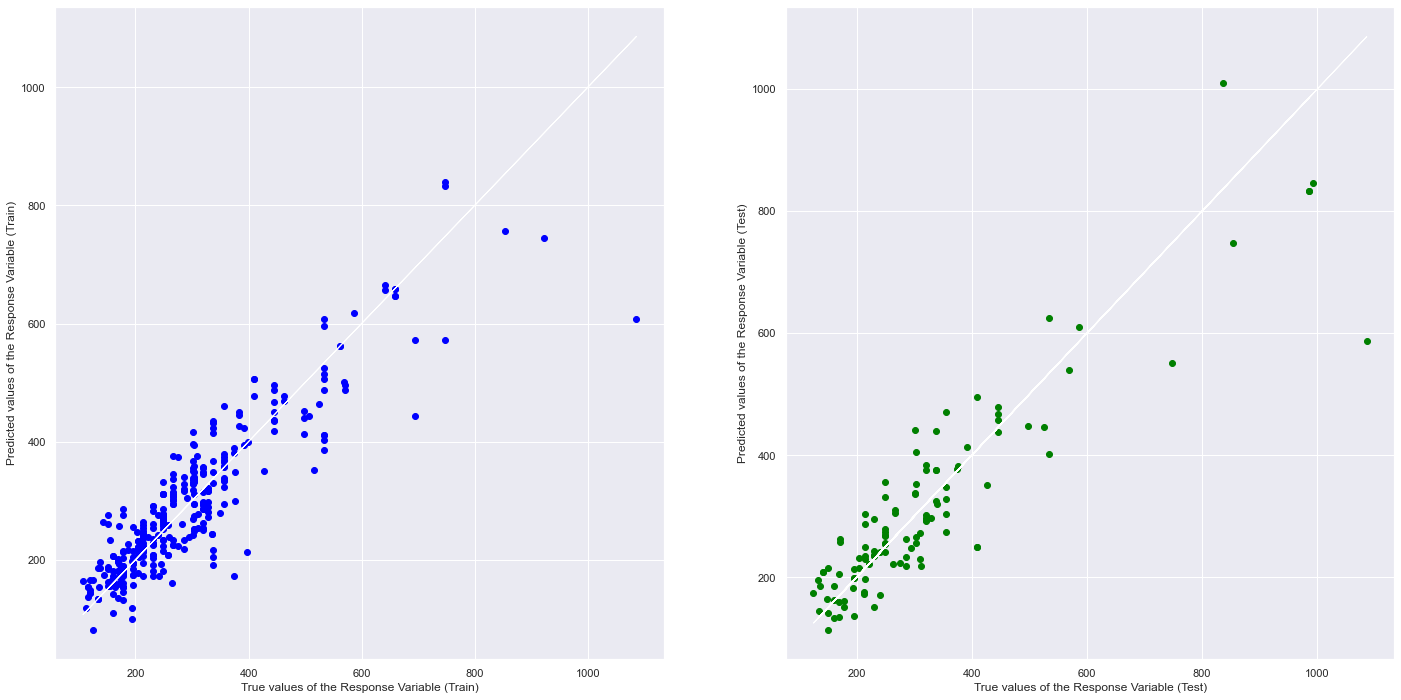

In [20]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [21]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8186056894787881
Mean Squared Error (MSE) 	: 3684.4688390720166

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8165769939768217
Mean Squared Error (MSE) 	: 6519.39468801481



The performance of the Linear Regression model significantly reduced after feature selection. Let's see what happens for the other model.

## Random Forest Regressor

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


rforest = RandomForestRegressor(n_estimators = 1500,  # CHANGE AND EXPERIMENT
                                 max_depth = 5)       # CHANGE AND EXPERIMENT

rforest.fit(X_train, y_train.mobile_price.ravel())

RandomForestRegressor(max_depth=5, n_estimators=1500)

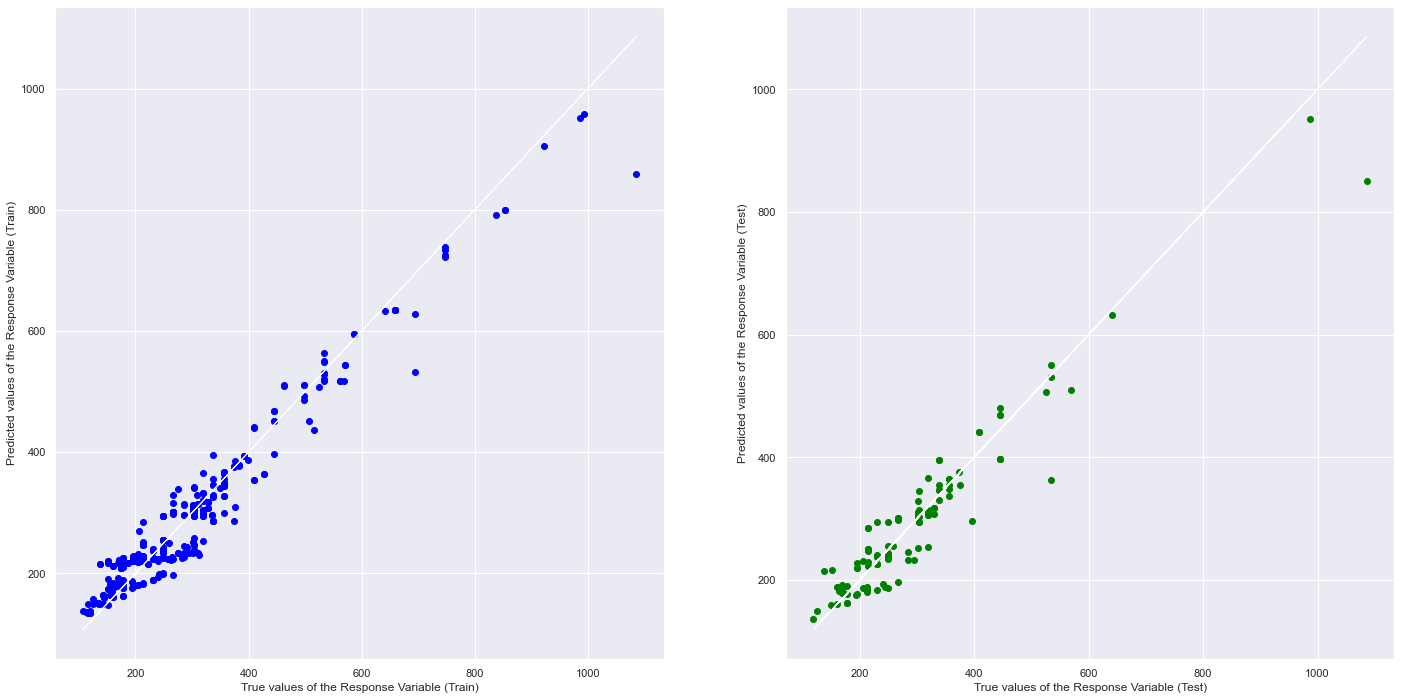

In [20]:
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rforest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9516277897126675
Mean Squared Error (MSE) 	: 1238.8074119213104

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9099798080685204
Mean Squared Error (MSE) 	: 1822.6257843969802



Similar performance with the previous one.

## GridSearch

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


param_grid = {'n_estimators': np.arange(800,1801,100),   
              'max_depth': np.arange(7, 13)}             

hpGrid = GridSearchCV(RandomForestRegressor(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'r2')       

hpGrid.fit(X_train, y_train.mobile_price.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 7,  8,  9, 10, 11, 12]),
                         'n_estimators': array([ 800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800])},
             scoring='r2')

In [25]:
print("Best Estimator:", hpGrid.best_estimator_)

print("Best Score:", np.abs(hpGrid.best_score_))

Best Estimator: RandomForestRegressor(max_depth=10, n_estimators=1100)
Best Score: 0.9178204614753449


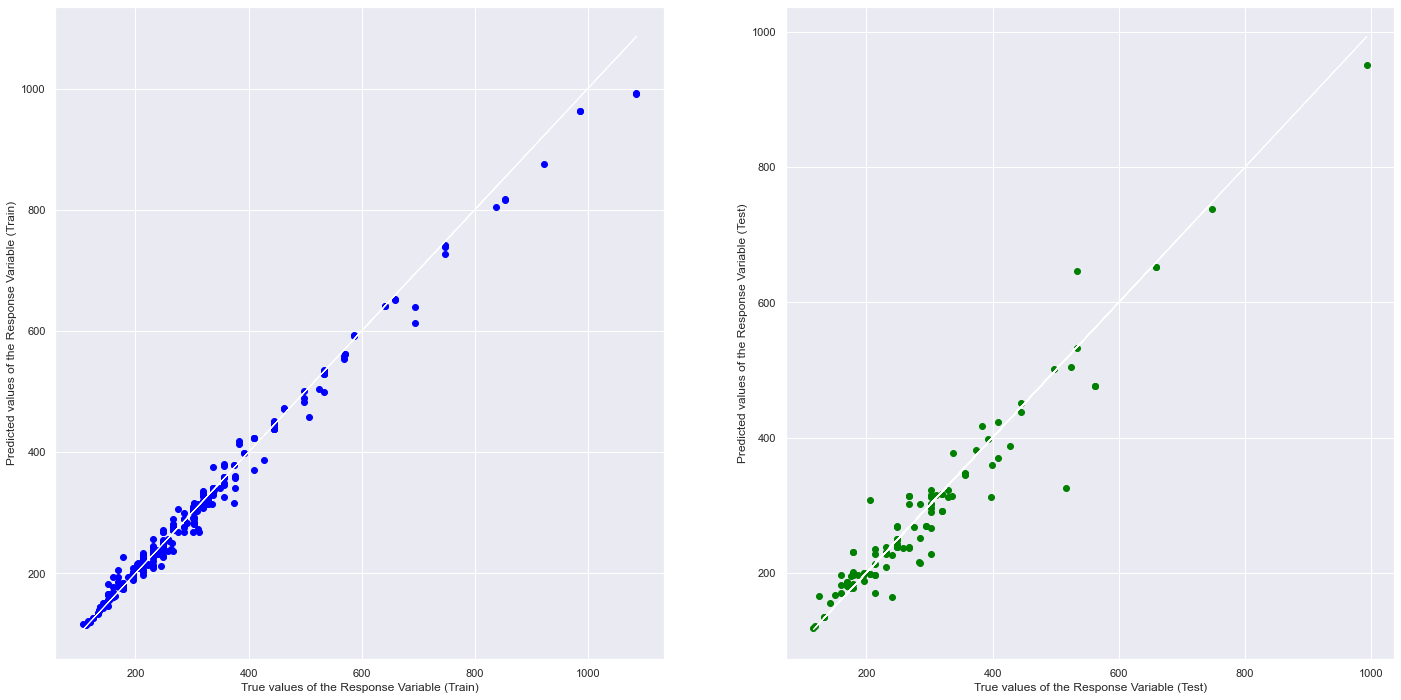

In [26]:
y_train_pred = hpGrid.predict(X_train)
y_test_pred = hpGrid.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [27]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", hpGrid.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", hpGrid.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9897632900981872
Mean Squared Error (MSE) 	: 265.6156680243881

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9318677291784534
Mean Squared Error (MSE) 	: 1307.3858260458935



In the case of using GridSearch, we obtain higher best score after feature selection, while R^2 and MSE are still about the same.<br>
We can conclude that our assumption in the EDA part is mostly correct: as the performance of the Random Forest Regressor model remains about the same after removing those irrelevant data.<br>

However, the performance deteriorate for the Linear Regression model. This might because of the features that are important for the Linear Regression model might not be the case for Random Forest Regressor.